In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [18]:
## data of runs made by players
df = pd.read_csv("Result-Player-Points-2020.csv")
df = df.replace('-','0')

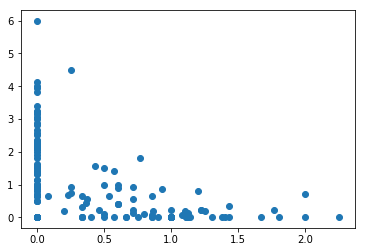

In [19]:
## extracting some useful features and converting them to float
x1 = df.iloc[:,4].astype(float) / df.iloc[:,3].astype(float)
x2 = df.iloc[:,6].astype(float) / df.iloc[:,3].astype(float)
x3 = df.iloc[:,7].astype(float) / df.iloc[:,3].astype(float)
data = np.zeros((len(x1),3))
data[:,0] = x1 
data[:,1] = x2
data[:,2] = x3
#data = (data - data.mean(axis=0))/data.std(axis=0)
plt.scatter(data[:,0],data[:,1])

In [23]:
## applying K-means clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

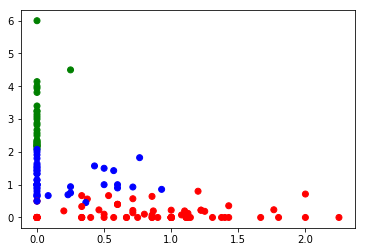

In [24]:
## visualizing the clusters 
colors = np.array(['r','g','b'])
plt.scatter(x1,x2,c=colors[labels])
#plt.scatter(centroids[:,0],centroids[:,1],c='k')

In [25]:
players = [[],[],[]]
for i in range(len(df)):
    players[labels[i]].append(df.iloc[i,1])
players

[['Jofra Archer',
  'Kagiso Rabada',
  'Jasprit Bumrah',
  'Rashid Khan',
  'Trent Boult',
  'Anrich Nortje',
  'Pat Cummins',
  'Mohammad Shami',
  'T Natarajan',
  'Yuzvendra Chahal',
  'Axar Patel',
  'Varun Chakravarthy',
  'Washington Sundar',
  'Ravi Bishnoi',
  'Krunal Pandya',
  'Sandeep Sharma',
  'Deepak Chahar',
  'Rahul Chahar',
  'Ravichandran Ashwin',
  'Chris Morris',
  'Navdeep Saini',
  'Shreyas Gopal',
  'Mohammed Siraj',
  'Jason Holder',
  'James Pattinson',
  'Kartik Tyagi',
  'Murugan Ashwin',
  'Chris Jordan',
  'Shardul Thakur',
  'Shivam Mavi',
  'Nathan Coulter-Nile',
  'Arshdeep Singh',
  'Khaleel Ahmed',
  'Isuru Udana',
  'Lockie Ferguson',
  'Sheldon Cottrell',
  'Kamlesh Nagarkoti',
  'Lungi Ngidi',
  'Dwayne Bravo',
  'Piyush Chawla',
  'Shahbaz Nadeem',
  'Prasidh Krishna',
  'Jaydev Unadkat',
  'Tushar Deshpande',
  'Bhuvneshwar Kumar',
  'Karn Sharma',
  'Ankit Rajpoot',
  'Harshal Patel',
  'Jimmy Neesham',
  'Josh Hazlewood',
  'Amit Mishra',
  'Dan

In [26]:
df1 = pd.read_csv("Result-Most-Runs-2020.csv")

In [27]:
## scores for starting order batsman
rank = (df1.iloc[:,5]/df1.iloc[:,2])/30  +  (df1.iloc[:,9]/100)
a = np.zeros((len(rank),))
a[df1.iloc[:,3]>10] = 1
rank = rank*a
rankMap = {}
for i in range(len(rank)):
    rankMap[df1.iloc[i,1]] = rank[i]


In [28]:
## scores for middle order batsman
rank2 =  (df1.iloc[:,9]/100) + (df1.iloc[:,13]/max(df1.iloc[:,13]))
rank2Map = {}
for i in range(len(rank2)):
    rank2Map[df1.iloc[i,1]] = rank2[i]
    

In [29]:
## scores for bowlers
df2 = pd.read_csv("Result-Most-Wickets-2020.csv")
rank3 = (df2.iloc[:,6]/max(df2.iloc[:,6])) + (7/df2.iloc[:,9])
rank3Map = {}
for i in range(len(rank3)):
    rank3Map[df2.iloc[i,1]] = rank3[i]

In [33]:
playerScore = [{},{},{}]

## here you have to check the cluster group and accordingly rank them 
for i in players[0] :
    if i in rank3Map :
        playerScore[2][i] = rank3Map[i]
for i in players[1] :
    if i in rankMap :
        playerScore[0][i] = rankMap[i]
for i in players[2] :
    if i in rank2Map :
        playerScore[1][i] = rank2Map[i]

In [34]:
a = Counter(playerScore[0])
start = a.most_common(4)
a = Counter(playerScore[1])
mid = a.most_common(3)
a = Counter(playerScore[2])
end = a.most_common(4)

In [35]:
print(start)
print(mid)
print(end)

[('KL Rahul', 2.888638095238095), ('Mayank Agarwal', 2.849348484848485), ('Ishan Kishan', 2.6861714285714284), ('Shikhar Dhawan', 2.6590647058823524)]
[('Kieron Pollard', 2.647533333333333), ('Hardik Pandya', 2.623133333333333), ('Nicholas Pooran', 2.5304333333333333)]
[('Rashid Khan', 1.9702048417132216), ('Jasprit Bumrah', 1.940118870728083), ('Kagiso Rabada', 1.839328537170264), ('Jofra Archer', 1.7353689567430024)]
